In [1]:
# Gerekli Kütüphanelerin Yüklenmesi

In [1]:
import os
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import random
from sklearn.svm import SVC
from sklearn.metrics.pairwise import rbf_kernel

/Users/ertan.cevik/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# 2. Veri Seti Yükleme ve Ön İşleme

In [2]:
dataset_dir = 'data'

train_data = pd.read_csv(dataset_dir + '/Train.csv')
test_data = pd.read_csv(dataset_dir + '/Test.csv')

images = []
labels = []

for label in os.listdir(dataset_dir + "/Train"):
    label_path = os.path.join(dataset_dir + "/Train", label)
    if os.path.isdir(label_path):
        for image_name in os.listdir(label_path):
            image_path = os.path.join(label_path, image_name)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (32, 32))
            images.append(image)
            labels.append(int(label))

images = np.array(images)
labels = np.array(labels)

In [3]:
print(train_data.isnull().sum())

Width      0
Height     0
Roi.X1     0
Roi.Y1     0
Roi.X2     0
Roi.Y2     0
ClassId    0
Path       0
dtype: int64


In [4]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

print(f"Eğitim veri kümesi: {len(X_train)}")
print(f"Test veri kümesi: {len(X_test)}")

Eğitim veri kümesi: 31367
Test veri kümesi: 7842


In [5]:
scaler = StandardScaler()

X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2] * X_train.shape[3])
X_train_StandardScaler = scaler.fit_transform(X_train_reshaped)

X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2] * X_test.shape[3])
X_test_StandardScaler = scaler.fit_transform(X_test_reshaped)

print("StandardScaler eğitim veri kümesi:\n", X_train_StandardScaler)
print("StandardScaler test veri kümesi:\n", X_test_StandardScaler)

StandardScaler eğitim veri kümesi:
 [[-0.87284342 -0.94300254 -0.94328613 ... -0.74451189 -0.81672041
  -0.824692  ]
 [ 1.83929959  1.76893911  0.90095376 ... -0.17609931  0.04331942
   0.07028312]
 [ 1.08092785  0.79107554  0.54780144 ... -0.4603056  -0.76980915
  -0.91727564]
 ...
 [-0.62862201 -0.63008619 -0.66861211 ... -0.06557464  1.02845597
   1.3973152 ]
 [-0.43581564 -0.68223892 -0.85172812 ... -0.14452083 -0.17559981
  -0.14574536]
 [-0.12732544 -0.19982622 -0.23698149 ...  0.01337155 -0.06614019
  -0.09945354]]
StandardScaler test veri kümesi:
 [[ 2.01362331  2.1510283   2.14181123 ...  0.22289058  0.50395412
   0.49467481]
 [-0.76715281 -0.83641352 -0.8786714  ...  2.92449646  2.89884844
   2.83048106]
 [ 0.07088931 -0.57776055 -0.96980665 ... -0.18079765 -0.16043591
  -0.08546008]
 ...
 [ 2.11520417  2.1510283   2.14181123 ...  0.92158176  0.93658019
   0.92214262]
 [-0.69096716 -0.74588498 -0.7614975  ... -0.58448589 -0.63941477
  -0.61979484]
 [-0.69096716 -0.79761558 -0

In [ ]:
# 3. Model Eğitimi ve Hiperparametre Denemeleri

In [21]:
mlp_model_1 = MLPClassifier(
    hidden_layer_sizes=(100, 100),
    solver='sgd',
    activation='relu',
    learning_rate='adaptive',
    learning_rate_init=0.001,
    max_iter=500,
    random_state=42
)
mlp_model_1.fit(X_train_StandardScaler, y_train)

y_pred_model_1 = mlp_model_1.predict(X_test_StandardScaler)
mlp_model_1_accuracy = accuracy_score(y_test, y_pred_model_1)

print(f"MLP Model 1 için doğruluk oranı: {mlp_model_1_accuracy * 100:.2f}%")

MLP Model 1 için doğruluk oranı: 96.85%


In [25]:
mlp_model_2 = MLPClassifier(
    hidden_layer_sizes=(100,),
    solver='adam',
    activation='relu',
    learning_rate='adaptive',
    learning_rate_init=0.001,
    max_iter=100,
    random_state=42
)
mlp_model_2.fit(X_train_StandardScaler, y_train)

y_pred_model_2 = mlp_model_2.predict(X_test_StandardScaler)
mlp_model_2_accuracy = accuracy_score(y_test, y_pred_model_2)

print(f"MLP Model 2 için doğruluk oranı: {mlp_model_2_accuracy * 100:.2f}%")

MLP Model 2 için doğruluk oranı: 94.39%


In [19]:
clf = SVC(kernel='rbf', gamma='scale') 
clf.fit(X_train_StandardScaler, y_train)

y_pred_rbf = clf.predict(X_test_StandardScaler)
rbf_model_accuracy = accuracy_score(y_test, y_pred_rbf)

print(f"RBF modeli için doğruluk oranı: {rbf_model_accuracy * 100:.2f}%")

RBF modeli için doğruluk oranı: 87.75%


In [ ]:
# RBF modeli çok uzun sürdü ve doğruluk oranı diğerlerine göre az çıktı

In [ ]:
# 4. Performans Ölçümleri

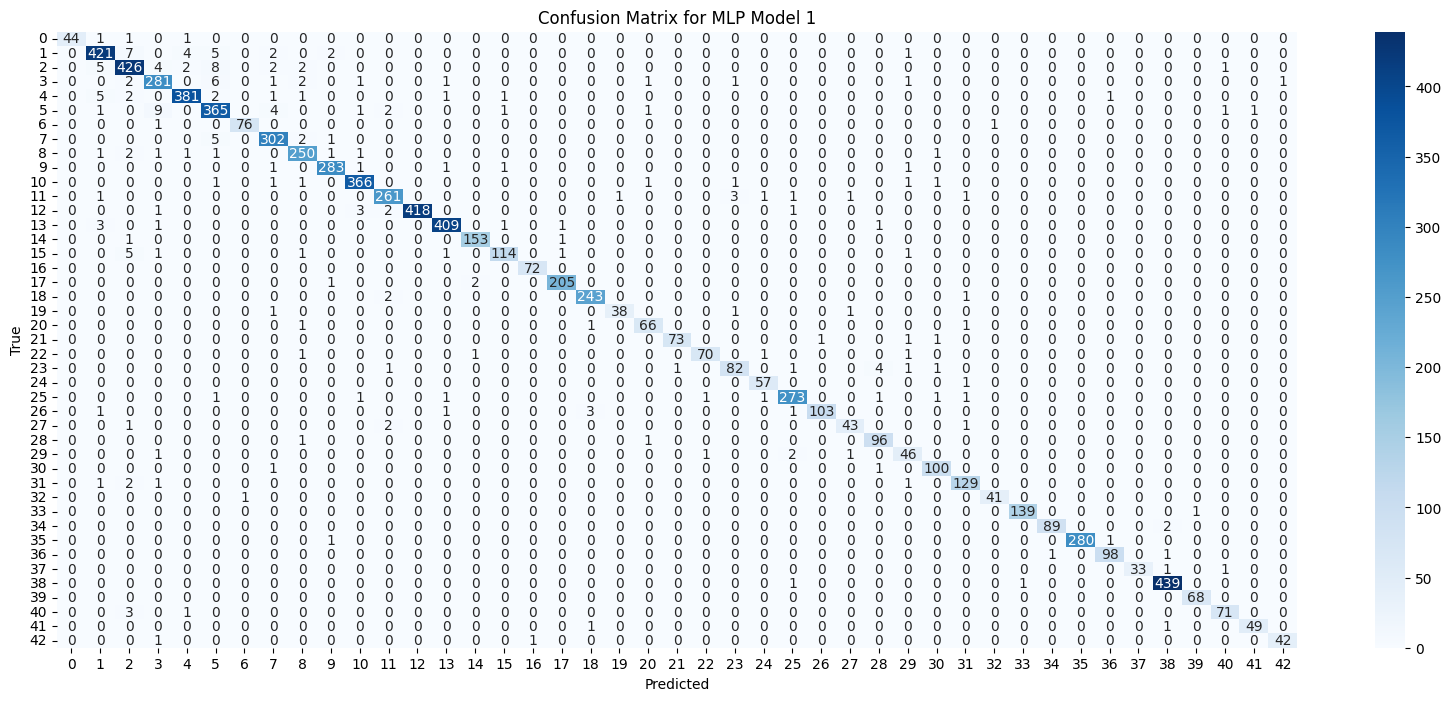

In [23]:
mlp_model_1_confusion_matrix = confusion_matrix(y_test, y_pred_model_1)

plt.figure(figsize=(20, 8))
sns.heatmap(mlp_model_1_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for MLP Model 1')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

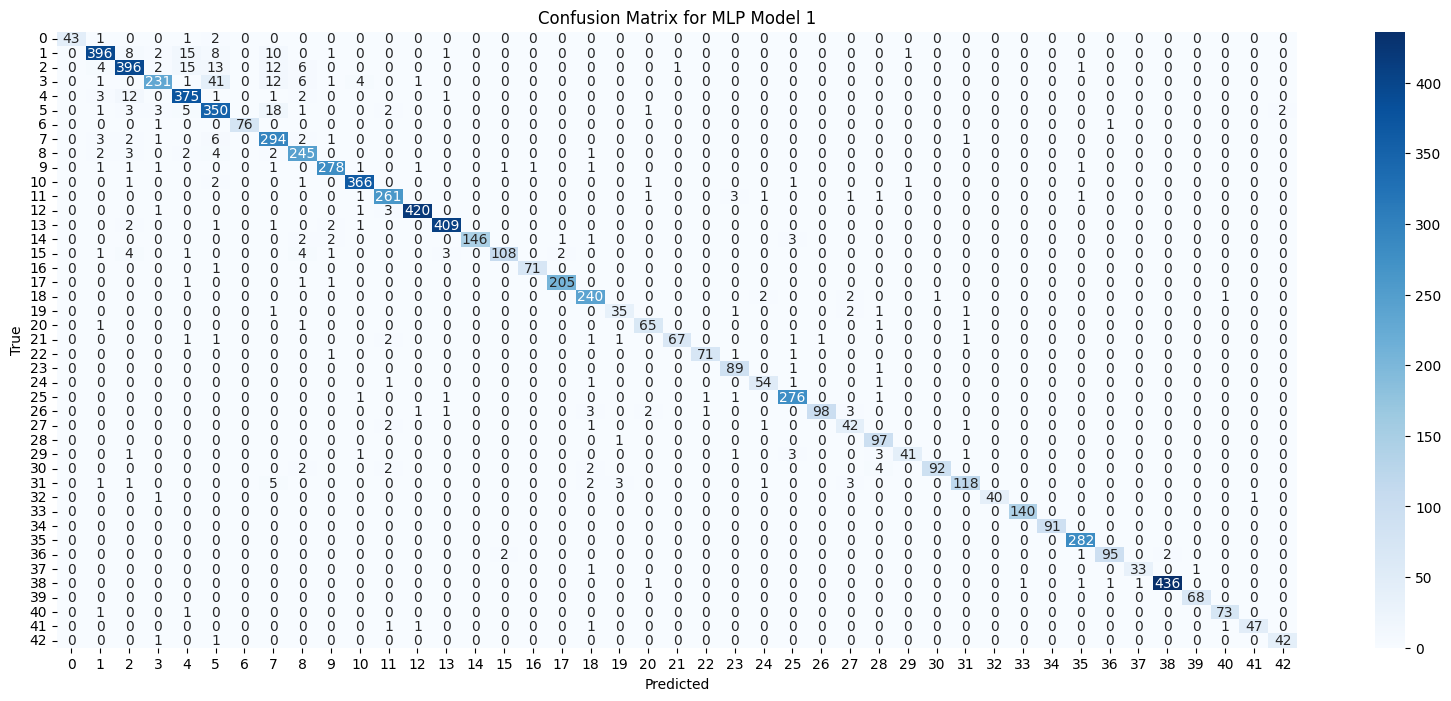

In [26]:
mlp_model_2_confusion_matrix = confusion_matrix(y_test, y_pred_model_2)

plt.figure(figsize=(20, 8))
sns.heatmap(mlp_model_2_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for MLP Model 2')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

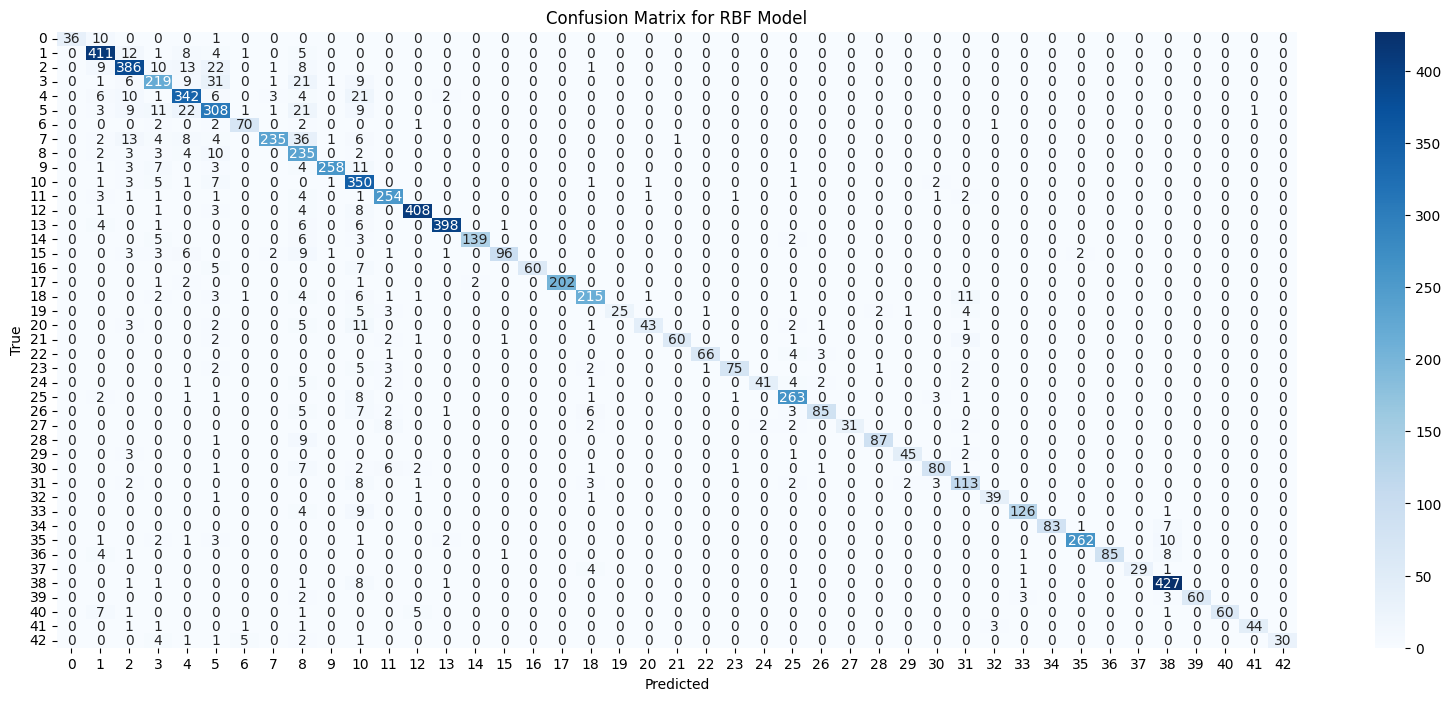

In [20]:
rbf_model_confusion_matrix = confusion_matrix(y_test, y_pred_rbf)

plt.figure(figsize=(20, 8))
sns.heatmap(rbf_model_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for RBF Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [24]:
print("MLP Model 1:")
print(classification_report(y_test, y_pred_model_1))

MLP Model 1:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        47
           1       0.96      0.95      0.95       442
           2       0.94      0.95      0.94       450
           3       0.93      0.94      0.94       298
           4       0.98      0.96      0.97       395
           5       0.93      0.95      0.94       386
           6       0.99      0.97      0.98        78
           7       0.96      0.97      0.96       310
           8       0.95      0.97      0.96       259
           9       0.98      0.98      0.98       288
          10       0.98      0.98      0.98       373
          11       0.97      0.97      0.97       270
          12       1.00      0.98      0.99       425
          13       0.99      0.98      0.98       416
          14       0.98      0.99      0.98       155
          15       0.97      0.92      0.94       124
          16       0.99      1.00      0.99        72
          17  

In [27]:
print("MLP Model 2:")
print(classification_report(y_test, y_pred_model_2))

MLP Model 2:
              precision    recall  f1-score   support

           0       1.00      0.91      0.96        47
           1       0.95      0.90      0.92       442
           2       0.91      0.88      0.90       450
           3       0.95      0.78      0.85       298
           4       0.90      0.95      0.92       395
           5       0.81      0.91      0.86       386
           6       1.00      0.97      0.99        78
           7       0.82      0.95      0.88       310
           8       0.90      0.95      0.92       259
           9       0.97      0.97      0.97       288
          10       0.97      0.98      0.98       373
          11       0.95      0.97      0.96       270
          12       0.99      0.99      0.99       425
          13       0.98      0.98      0.98       416
          14       1.00      0.94      0.97       155
          15       0.97      0.87      0.92       124
          16       0.99      0.99      0.99        72
          17  

In [21]:
print("RBF Model:")
print(classification_report(y_test, y_pred_rbf))

RBF Model:
              precision    recall  f1-score   support

           0       1.00      0.77      0.87        47
           1       0.88      0.93      0.90       442
           2       0.84      0.86      0.85       450
           3       0.77      0.73      0.75       298
           4       0.82      0.87      0.84       395
           5       0.73      0.80      0.76       386
           6       0.89      0.90      0.89        78
           7       0.97      0.76      0.85       310
           8       0.57      0.91      0.70       259
           9       0.98      0.90      0.94       288
          10       0.69      0.94      0.80       373
          11       0.90      0.94      0.92       270
          12       0.97      0.96      0.97       425
          13       0.98      0.96      0.97       416
          14       0.99      0.90      0.94       155
          15       0.97      0.77      0.86       124
          16       1.00      0.83      0.91        72
          17    

In [ ]:
# 5. Hiperparametre Denemeleri ve Sonuçları Karşılaştırma

In [6]:
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 100), (200,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate_init': [0.0001, 0.001, 0.01],
}

grid_search = GridSearchCV(MLPClassifier(max_iter=1000, random_state=42), param_grid, cv=5)
grid_search.fit(X_train_StandardScaler, y_train)

print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'activation': 'logistic', 'hidden_layer_sizes': (200,), 'learning_rate_init': 0.0001}


In [8]:
mlp_model_3 = MLPClassifier(
    hidden_layer_sizes=(200,),
    solver='sgd',
    activation='logistic',
    learning_rate='adaptive',
    learning_rate_init=0.0001,
    max_iter=1000,
    random_state=42
)
mlp_model_3.fit(X_train_StandardScaler, y_train)

y_pred_model_3 = mlp_model_3.predict(X_test_StandardScaler)
mlp_model_3_accuracy = accuracy_score(y_test, y_pred_model_3)

print(f"MLP Model 3 için doğruluk oranı: {mlp_model_3_accuracy * 100:.2f}%")

MLP Model 3 için doğruluk oranı: 90.00%


/Users/ertan.cevik/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


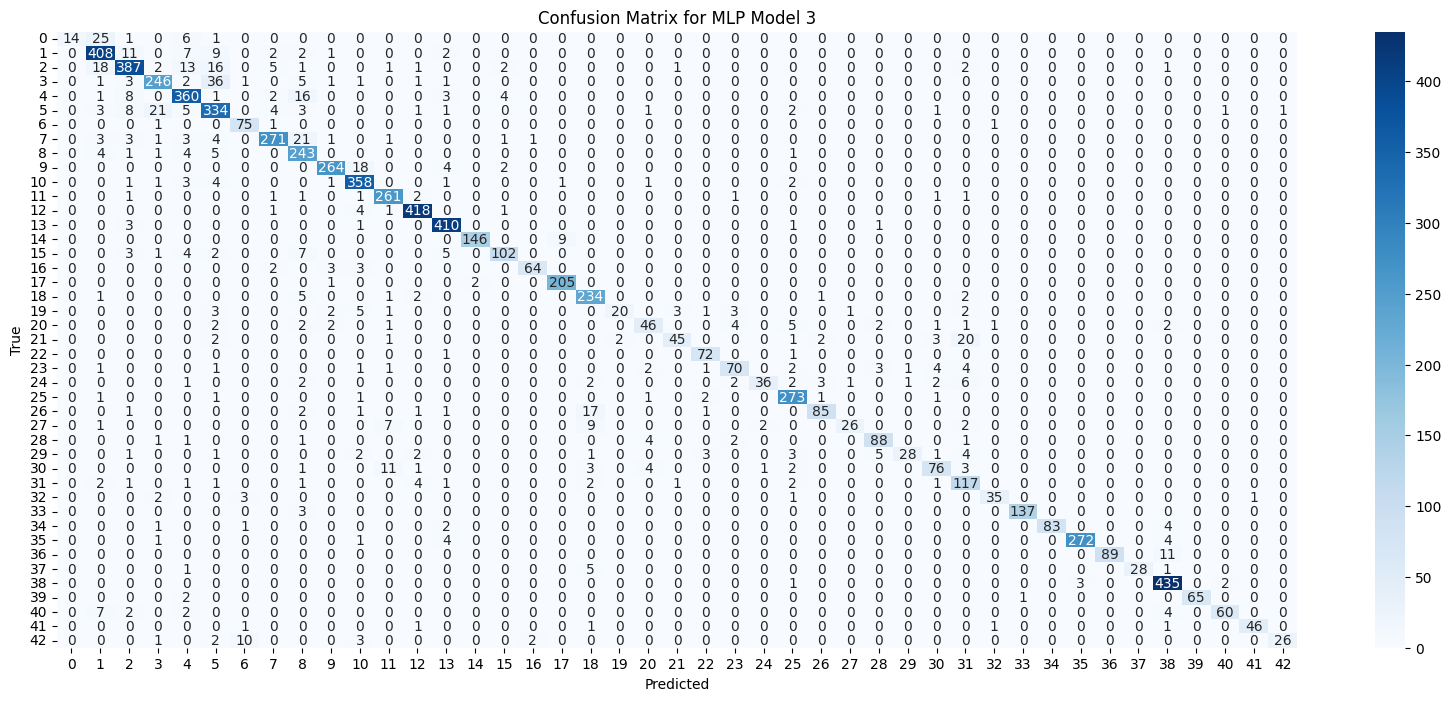

In [10]:
mlp_model_3_confusion_matrix = confusion_matrix(y_test, y_pred_model_3)

plt.figure(figsize=(20, 8))
sns.heatmap(mlp_model_3_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for MLP Model 3')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [11]:
print("MLP Model 3:")
print(classification_report(y_test, y_pred_model_3))

MLP Model 3:
              precision    recall  f1-score   support

           0       1.00      0.30      0.46        47
           1       0.86      0.92      0.89       442
           2       0.89      0.86      0.87       450
           3       0.88      0.83      0.85       298
           4       0.87      0.91      0.89       395
           5       0.79      0.87      0.82       386
           6       0.82      0.96      0.89        78
           7       0.94      0.87      0.90       310
           8       0.77      0.94      0.85       259
           9       0.96      0.92      0.94       288
          10       0.90      0.96      0.93       373
          11       0.91      0.97      0.94       270
          12       0.96      0.98      0.97       425
          13       0.94      0.99      0.96       416
          14       0.99      0.94      0.96       155
          15       0.91      0.82      0.86       124
          16       0.96      0.89      0.92        72
          17  

In [13]:
mlp_model_4 = MLPClassifier(
    hidden_layer_sizes=(200,),
    solver='adam',
    activation='tanh',
    learning_rate='adaptive',
    learning_rate_init=0.001,
    max_iter=1000,
    random_state=42
)
mlp_model_4.fit(X_train_StandardScaler, y_train)

y_pred_model_4 = mlp_model_4.predict(X_test_StandardScaler)
mlp_model_4_accuracy = accuracy_score(y_test, y_pred_model_4)

print(f"MLP Model 4 için doğruluk oranı: {mlp_model_4_accuracy * 100:.2f}%")

MLP Model 4 için doğruluk oranı: 94.15%


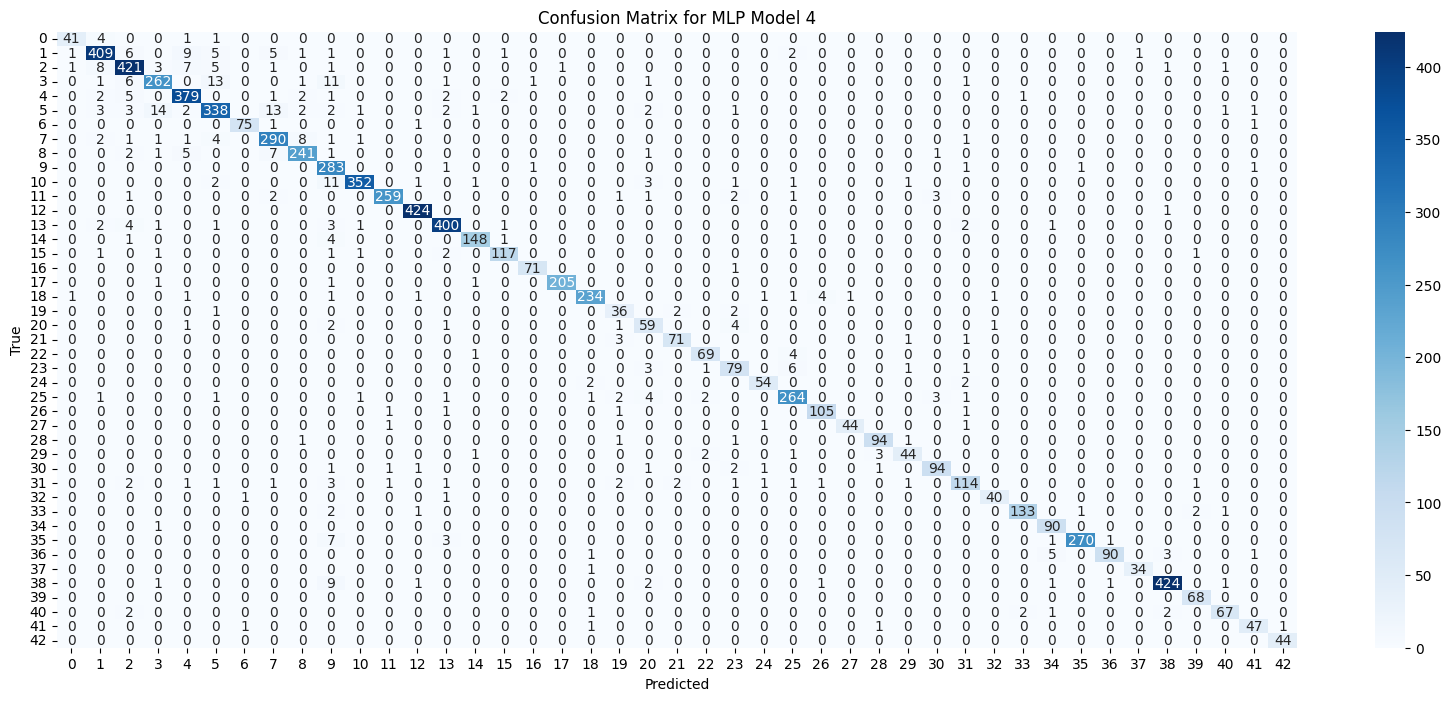

In [14]:
mlp_model_4_confusion_matrix = confusion_matrix(y_test, y_pred_model_4)

plt.figure(figsize=(20, 8))
sns.heatmap(mlp_model_4_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for MLP Model 4')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [15]:
print("MLP Model 4:")
print(classification_report(y_test, y_pred_model_4))

MLP Model 4:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        47
           1       0.94      0.93      0.93       442
           2       0.93      0.94      0.93       450
           3       0.92      0.88      0.90       298
           4       0.93      0.96      0.95       395
           5       0.91      0.88      0.89       386
           6       0.97      0.96      0.97        78
           7       0.90      0.94      0.92       310
           8       0.94      0.93      0.94       259
           9       0.82      0.98      0.89       288
          10       0.99      0.94      0.96       373
          11       0.98      0.96      0.97       270
          12       0.99      1.00      0.99       425
          13       0.96      0.96      0.96       416
          14       0.97      0.95      0.96       155
          15       0.96      0.94      0.95       124
          16       0.97      0.99      0.98        72
          17  